# Estufas

$\textbf{Rampa de temperatura nas estufas:}$
- Curta: 
    - 45C: 1 dia;
    - 60°C: 1 dia;
    - 90°C: 1 semana.
- Média: 
    - 45C: 1 dia;
    - 60°C: 1 dia;
    - 90°C: 1 mês.
- Longa: 
    - 45C: 1 semana;
    - 60°C: 1 semana;
    - 90°C: 1 mês.

# Controle geral das amostras

In [3]:
# Comments:
'''
None.
'''

# Libraries:
from os.path import exists, join
from datetime import datetime, timedelta
from pandas import read_excel, to_datetime, ExcelWriter, isnull

# Classes:

# Functions:
## Introduction to the program:
def intro():
    print('Welcome to the "Controle de Amostras nas Estufas"!')
    print('With this program you will be able to keep counts of the samples on each drying chamber.')
    print('Let\'s start!')
## Read the file data:
def read_file():
    # Get the folder path in which the Excel sheet is within:
    while True:
        with open("Gerenciador de Caminhos.txt", mode='rt') as f:
            folder = f.read()
            f.close()
        if not exists(folder):
        
    # Find the Excel sheet:
    
    
## Main control function:
def main():
    # Welcome the user to the program:
    intro()
    # Get the file data:
    read_file()

# Run the program:
main()

Welcome to the "Controle de Amostras nas Estufas"!
With this program you will be able to keep counts of the samples on each drying chamber.
Let's start!


'C:\\Users\\eduar\\Desktop\\Estudos\\Iniciacao Cientifica\\Projetos\\Fabricacao de Fibras Opticas Polimericas\\Versao 2\\Geral'

In [12]:
# Realiza o controle das amostras nas estufas
from datetime import datetime, timedelta
from pandas import read_excel, to_datetime, ExcelWriter, isnull

path = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Controle\Estufas.xlsx"

df = read_excel(path)

# Calculate the ratio thickness/diameter:
ind = df.loc[df['Tipo']=='Capilar'].index
df.loc[ind,'Razão'] = df.loc[ind,'Espessura (mm)'] / df.loc[ind,'Diâmetro externo (mm)']

# Convert columns into the correct dtype:
df['Amostra'] = df['Amostra'].astype(int)
for T in ['Entrada 45°C', 'Entrada 60°C', 'Entrada 90°C']:
    df[T] = to_datetime(df[T], format='%d/%m/%Y-%H:%M')
df['Status pré-forma'] = df['Status pré-forma'].astype(str)
df['Status rampa'] = df['Status rampa'].astype(str)
df['Status final'] = df['Status final'].astype(str)
df['Ação'] = df['Ação'].astype(str)

# Verificar etapas da pré-forma:
def setPreformStatus():
    for i in df.index:
        if df.loc[i, 'Tipo'] == 'Fibra':
            if df.loc[i, 'Pino'] == 'OK':
                df.loc[i, 'Status pré-forma'] = 'Pino finalizado'
            elif df.loc[i, 'Rosca'] == 'OK':
                df.loc[i, 'Status pré-forma'] = 'Rosca finalizada'
            elif df.loc[i, 'Furação'] == 'OK':
                df.loc[i, 'Status pré-forma'] = 'Furação finalizada'
            elif df.loc[i, 'Degrau'] == 'OK':
                df.loc[i, 'Status pré-forma'] = 'Degrau finalizado'
            elif df.loc[i, 'Faceada'] == 'OK':
                df.loc[i, 'Status pré-forma'] = 'Faceada'
            else:
                df.loc[i, 'Status pré-forma'] = 'Cortada'

# Verificar tempo das amostras nas estufas:
def setTemperatureStatus():
    rampa = {'Curta': {'45°C': 1, '60°C': 1, '90°C': 7}, 'Média': {'45°C': 1, '60°C': 1, '90°C': 28}, 'Longa': {'45°C': 7, '60°C': 7, '90°C': 28}}
    now = datetime.now()
    for i in df.index:
        # 90°C:
        if isnull(df.loc[i, 'Entrada 90°C']):
            pass
        elif now - df.loc[i, 'Entrada 90°C'] > timedelta(days=rampa[df.loc[i, 'Tipo rampa']]['90°C']):
            df.loc[i, 'Status rampa'] = '90°C finalizada'
            continue
        else:
            df.loc[i, 'Status rampa'] = '90°C incompleta'
            continue
        # 60°C:
        if isnull(df.loc[i, 'Entrada 60°C']):
            pass
        elif now - df.loc[i, 'Entrada 60°C'] > timedelta(days=rampa[df.loc[i, 'Tipo rampa']]['60°C']):
            df.loc[i, 'Status rampa'] = '60°C finalizada'
            continue
        else:
            df.loc[i, 'Status rampa'] = '60°C incompleta'
            continue
        # 45°C:
        if isnull(df.loc[i, 'Entrada 45°C']):
            pass
        elif now - df.loc[i, 'Entrada 45°C'] > timedelta(days=rampa[df.loc[i, 'Tipo rampa']]['45°C']):
            df.loc[i, 'Status rampa'] = '45°C finalizada'
            continue
        else:
            df.loc[i, 'Status rampa'] = '45°C incompleta'
            continue

# Escolher ação a ser tomada:
def takeAction():
    for i in df.index:
        if df.loc[i, 'Tipo'] == 'Fibra':
            if df.loc[i, 'Status pré-forma'] == 'Cortada':
                df.loc[i, 'Ação'] = 'Facear'
            elif df.loc[i, 'Status pré-forma'] == 'Faceada':
                df.loc[i, 'Ação'] = 'Fazer degrau'
            elif df.loc[i, 'Status pré-forma'] == 'Degrau finalizado':
                df.loc[i, 'Ação'] = 'Fazer furação'
            elif df.loc[i, 'Status pré-forma'] == 'Furação finalizada':
                df.loc[i, 'Ação'] = 'Fazer rosca'
            elif df.loc[i, 'Status pré-forma'] == 'Rosca finalizada':
                df.loc[i, 'Ação'] = 'Fazer pino'
            elif (df.loc[i, 'Status pré-forma'] == 'Pino finalizado') and (df.loc[i, 'Status rampa'] == '90°C finalizada'):
                if df.loc[i, 'Etapa'] == 'Pré-forma':
                    df.loc[i, 'Ação'] = 'Puxar 1º estágio'
                elif df.loc[i, 'Etapa'] == '1º estágio':
                    df.loc[i, 'Ação'] = 'Puxar 2º estágio'
            elif (df.loc[i, 'Status pré-forma'] == 'Pino finalizado') and (df.loc[i, 'Status rampa'] == '90°C incompleta'):
                df.loc[i, 'Ação'] = 'Esperar em 90°C'
            elif (df.loc[i, 'Status pré-forma'] == 'Pino finalizado') and (df.loc[i, 'Status rampa'] == '60°C finalizada'):
                df.loc[i, 'Ação'] = 'Mover para 90°C'
            elif (df.loc[i, 'Status pré-forma'] == 'Pino finalizado') and (df.loc[i, 'Status rampa'] == '60°C incompleta'):
                df.loc[i, 'Ação'] = 'Esperar em 60°C'
            elif (df.loc[i, 'Status pré-forma'] == 'Pino finalizado') and (df.loc[i, 'Status rampa'] == '45°C finalizada'):
                df.loc[i, 'Ação'] = 'Mover para 60°C'
            elif (df.loc[i, 'Status pré-forma'] == 'Pino finalizado') and (df.loc[i, 'Status rampa'] == '45°C incompleta'):
                df.loc[i, 'Ação'] = 'Esperar em 45°C'
        elif df.loc[i, 'Tipo'] in ['Capilar', 'Zeonex']:
            if df.loc[i, 'Status rampa'] == '90°C finalizada':
                if df.loc[i, 'Tipo'] == 'Capilar':
                    df.loc[i, 'Ação'] = 'Puxar 2º estágio'
                elif df.loc[i, 'Tipo'] == 'Zeonex':
                    df.loc[i, 'Ação'] = 'Usar no puxamento'
            elif df.loc[i, 'Status rampa'] == '90°C incompleta':
                df.loc[i, 'Ação'] = 'Esperar em 90°C'
            elif df.loc[i, 'Status rampa'] == '60°C finalizada':
                df.loc[i, 'Ação'] = 'Mover para 90°C'
            elif df.loc[i, 'Status rampa'] == '60°C incompleta':
                df.loc[i, 'Ação'] = 'Esperar em 60°C'
            elif df.loc[i, 'Status rampa'] == '45°C finalizada':
                df.loc[i, 'Ação'] = 'Mover para 60°C'
            elif df.loc[i, 'Status rampa'] == '45°C incompleta':
                df.loc[i, 'Ação'] = 'Esperar em 45°C'

# Altera informações devido status final:
def finalState():
    for i in df.index:
        if df.loc[i, 'Status final'] == 'Defeito':
            df.loc[i, ['Status pré-forma', 'Status rampa', 'Ação']] = ['X', 'X', 'X']
        elif df.loc[i, 'Status final'] == 'OK':
            df.loc[i, ['Status pré-forma', 'Status rampa', 'Ação']] = ['OK', 'OK', 'OK']

setTemperatureStatus()
setPreformStatus()
takeAction()
finalState()

# Convertendo de volta datetime para string:
for T in ['Entrada 45°C', 'Entrada 60°C', 'Entrada 90°C']:
    df[T] = df[T].dt.strftime('%d/%m/%Y-%H:%M')

# Exportando arquivo final:
with ExcelWriter(path, engine='openpyxl') as writer:
    df.to_excel(writer, index=False)

## Vizualizações

In [14]:
df.columns

Index(['Tipo', 'Grupo', 'Amostra', 'Importância', 'Configuração',
       'Comprimento (cm)', 'Diâmetro externo (mm)', 'Espessura (mm)', 'Razão',
       'Faceada', 'Degrau', 'Furação', 'Rosca', 'Pino', 'Etapa', 'Tipo rampa',
       'Entrada 45°C', 'Entrada 60°C', 'Entrada 90°C', 'Status pré-forma',
       'Status rampa', 'Ação', 'Status final'],
      dtype='object')

In [24]:
# Amostras prontas para 2º puxamento:
ind_puxamento2 = df.loc[df.loc[:, 'Ação'] == 'Puxar 2º estágio', 'Amostra'].index
df.loc[ind_puxamento2,:]
print('--- Amostras para 2º puxamento ---')
for i in ind_puxamento2:
    print(f"Tipo: {df.loc[i, 'Tipo']} | Amostra: {df.loc[i,'Amostra']}.")

--- Amostras para 2º puxamento ---
Tipo: Fibra | Amostra: 3.
Tipo: Fibra | Amostra: 4.
Tipo: Capilar | Amostra: 1.
Tipo: Capilar | Amostra: 2.
Tipo: Capilar | Amostra: 3.
Tipo: Capilar | Amostra: 4.


# Dados do puxamento

In [1]:
# Verfica a codificação do arquivo e faz modificações no arquivo .txt.

from chardet import detect

header = 'Time,Capstan speed,Preform feed rate,Temperature,Tension,Preform Pressure,Diameter,Diameter X,Diameter Y\n'

path = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\Projetos\Torre de Polimero\Versao 3\Amostras\Capilar - 3\Puxamento.txt"

with open(path, mode='rb') as f:
    detection = detect(f.read())
    f.close()

with open(path, mode='rt', encoding=detection['encoding']) as f:
    rows = f.readlines() 
    f.close()

if header in rows:
    print('Arquivo será processado.')
    ind = [i for i, row in enumerate(rows) if row == header]
    ind = ind[0]
    tuples = list(zip(rows[ind].replace('\n','').split(','), rows[ind+1].replace('\n','').split(',')))
    header = str()
    for i, tup in enumerate(tuples):
        if i == len(tuples) - 1:
            header += f'{tup[0]} {tup[1]}\n'
        else:
            header += f'{tup[0]} {tup[1]},'
    data = str()
    data = ''.join([data + row for i, row in enumerate(rows) if i > ind + 1])
    data = header + data
    with open(path, mode='wt') as g:
        g.write(data)
        g.close()
else:
    print('Este arquivo já foi processado.')

Este arquivo já foi processado.


Index(['Time [min]', 'Capstan speed [m/min]', 'Preform feed rate [mm/min]',
       'Temperature [ºC]', 'Tension [g]', 'Preform Pressure [mBar]',
       'Diameter [um]', 'Diameter X [um]', 'Diameter Y [um]'],
      dtype='object')


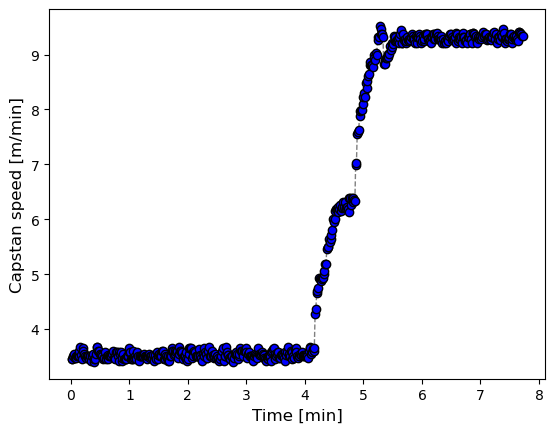

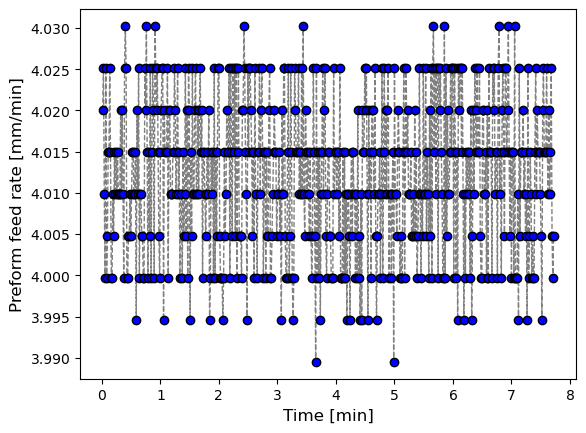

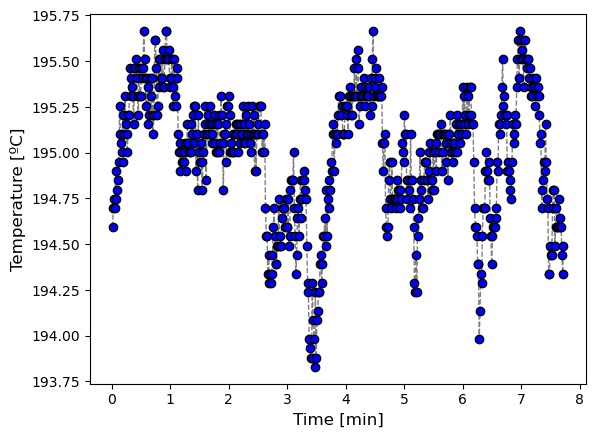

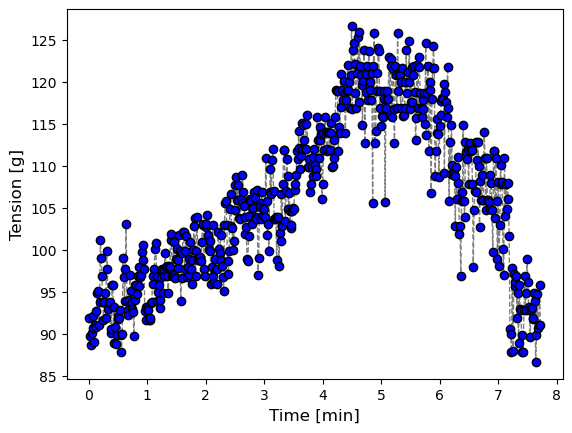

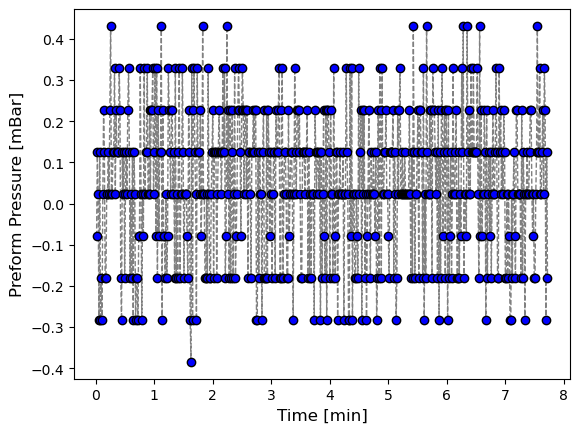

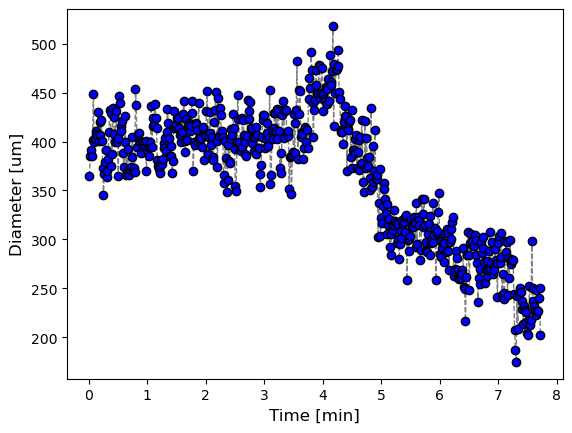

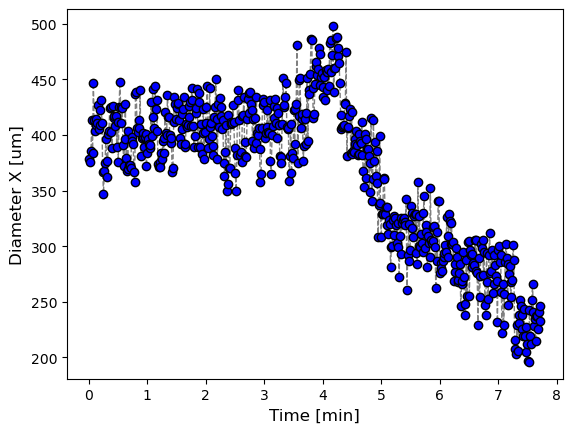

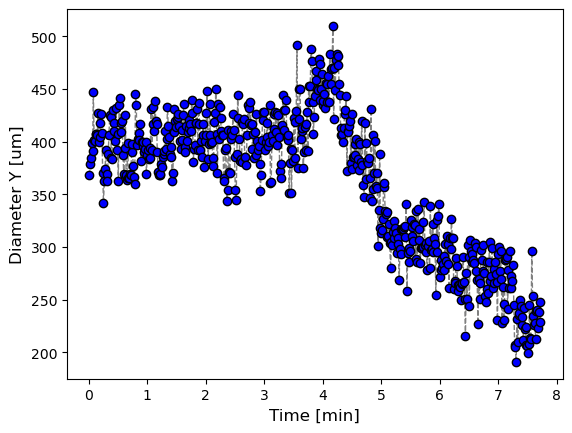

In [2]:
# Analisa os dados.

from pandas import read_csv
from matplotlib.pyplot import subplots, show

df = read_csv(path, sep=',', decimal='.')
print(df.columns)
for y in df.columns[1:]:
    fig, ax = subplots()
    ax.set_xlabel('Time [min]', loc='center', fontsize=12)
    ax.set_ylabel(f'{y}', loc='center', fontsize=12)
    ax.plot(df.loc[:,'Time [min]'], df.loc[:,y], color='gray', marker='o',linestyle='dashed', mec='black', mfc='blue', lw=1)
    show()
    fig.savefig(path.replace('Puxamento.txt', f"{y.split(' [')[0]} x Time.png"))

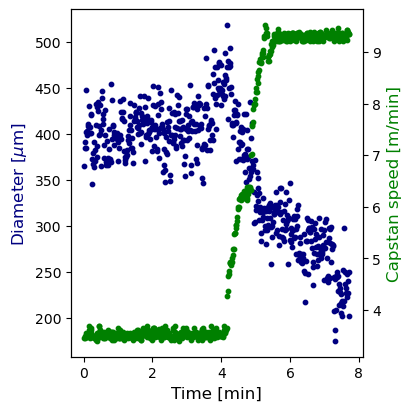

In [56]:
blue_rgb, green_rgb = (0,0,0.5), (0,0.5,0)

fig, ax1 = subplots(nrows=1, ncols=1, layout='constrained', figsize=(4,4))

ax1.set_xlabel('Time [min]', loc='center', fontsize=12)
ax1.set_ylabel(r'Diameter [$\mu$m]', loc='center', fontsize=12, color=blue_rgb)
ax1.scatter(df.loc[:,'Time [min]'], df.loc[:,'Diameter [um]'], s=10, color=blue_rgb, label='Diameter')

ax2 = ax1.twinx()
ax2.scatter(df.loc[:,'Time [min]'], df.loc[:,'Capstan speed [m/min]'], s=10, color=green_rgb, label='Capstan speed')
ax2.set_ylabel('Capstan speed [m/min]', loc='center', fontsize=12, color=green_rgb)

show()

,Time [min],Capstan speed [m/min],Preform feed rate [mm/min],Temperature [ºC],Tension [g],Preform Pressure [mBar],Diameter [um],Diameter X [um],Diameter Y [um]
1,0.013286,3.452495,4.020068,194.594482,91.881398,-0.078695,365,378,368
2,0.02665,3.452495,4.025164,194.696482,89.739772,0.125259,385,376,379


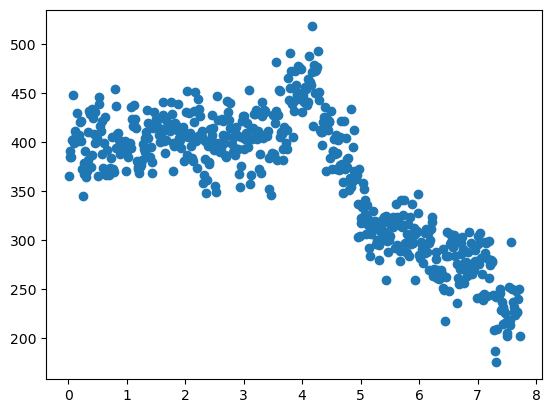

In [40]:
#

from pandas import read_excel
from matplotlib.pyplot import subplots, show

df = read_excel(r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras\Capilar - 3\Puxamento.xlsx", header=4)
df.columns = [f'{tup[0]} {tup[1]}' for i, tup in enumerate(zip(df.columns, df.iloc[0,:].values))]
df.drop(0, axis=0, inplace=True)
display(df.head(2))

fig, ax = subplots()
ax.scatter(df.loc[:,'Time [min]'].values, df.loc[:,'Diameter [um]'].values)
show()

# Manipulação de arquivos

In [8]:
# Copia pasta para outros diretórios

from os.path import join
from shutil import copytree

folder = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras"
sample = "Capilar - 1"
for i in range(10, 14):
    old_path = join(folder, sample)
    new_path = join(folder, sample.replace('1',f'{i}'))
    copytree(old_path, new_path)

In [16]:
# Exclui arquivos indesejados

from os import listdir, remove
from os.path import join, exists

dir = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras"
folder = "Capilar - 1"
files = listdir(join(dir, folder))
for file in ['build', 'Relatório.tex']:
    files.remove(file)

for i in range(10, 14):
    for file in files:
        path = join(dir, folder.replace('- 1', f'- {i}'), file)
        if exists(path):
            remove(path)

In [3]:
# Descompactar arquivos .zip para uma pasta

from os import remove
from os.path import join
from zipfile import ZipFile 

folder = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras"
archive = "Amostras.zip"
with ZipFile(join(folder, archive), mode='r') as zip:
    zip.extractall(join(folder, archive.replace('.zip', '')))
remove(join(folder, archive))

In [ ]:
# Mover arquivos da pasta decompacatada para diretório 

from os import listdir
from os.path import join
from shutil import move, rmtree

dir = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras"
folder = "Amostras"
for archive in listdir(join(dir, folder)):
    old_path = join(dir, folder, archive)
    new_path = join(dir, archive)
    move(old_path, dir)
rmtree(join(dir, folder))

In [ ]:
# Mover arquivos para outras pastas

from shutil import move
from os.path import join

folder = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras"
for i in range(10, 14):
    old_path = join(folder, f'{i}.jpeg') 
    name = 'Tubo.jpeg'
    new_path = join(folder, f'Capilar - {i}', name)
    move(old_path, new_path)

In [2]:
# Converte arquivos .tiff para .png

from os import listdir, remove
from os.path import join
from PIL import Image

dir = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\02 - Fibras polimericas\Amostras"
files_tiff = [file for file in listdir(dir) if '.tiff' in file]
files_png = [file.replace('.tiff', '.png') for file in files_tiff]
for file_tiff, file_png in zip(files_tiff, files_png):
    img = Image.open(join(dir, file_tiff))
    img.save(join(dir, file_png))
    remove(join(dir, file_tiff))

In [ ]:
# Renomeia arquivos:

from os import listdir, replace
from os.path import join

folder = r"C:\Users\eduar\Desktop\Estudos\Iniciacoes cientificas\Fibras opticas\2024\04 - Processamento de capilares"
paths = listdir(folder)
for path in paths:
    new_path = 'Sujeira - ' + path.replace(' - ', '.')
    replace(join(folder, path), join(folder, new_path))